<a href="https://colab.research.google.com/github/danhergir/neuralnet-/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# 1: Prepare and load (data)
# 2: Build model
# 3: Fitting the model to data (training)
# 4: Making predictions and evaluating a model (inference)
# 5: Saving and loading a model
# 6: Putting it all together

In [16]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

In [17]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [18]:
len(X), len(y)

(50, 50)

### Splitting data

In [19]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [20]:
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  if predictions is not None:
    plt.scatter(test_data, predictions)

  plt.legend(prop={'size': 14})

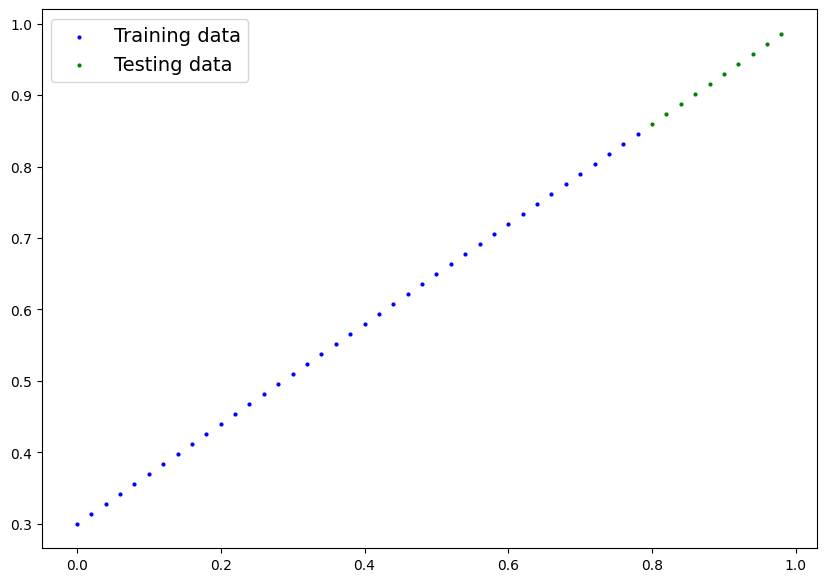

In [21]:
plot_predictions()

### 2 Build model

Model does:

- Start with random values (weight&bias)
- Look at training data and adjust the random values to better represent (or get closer to) the ideas values (the weight & bias values we used to create the data).

It does this through:
- backpropagation & gradient descent

In [22]:
class LinearRegressionModel(nn.Module): # <- almost everything in pytorch inheritances from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias


In [23]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [24]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [25]:
# Making predictions using ´torch.inference_mode()´

# To check our model's predictive power, let's see how well it predicts 'y_test' based on 'X_test'

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [26]:
 y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

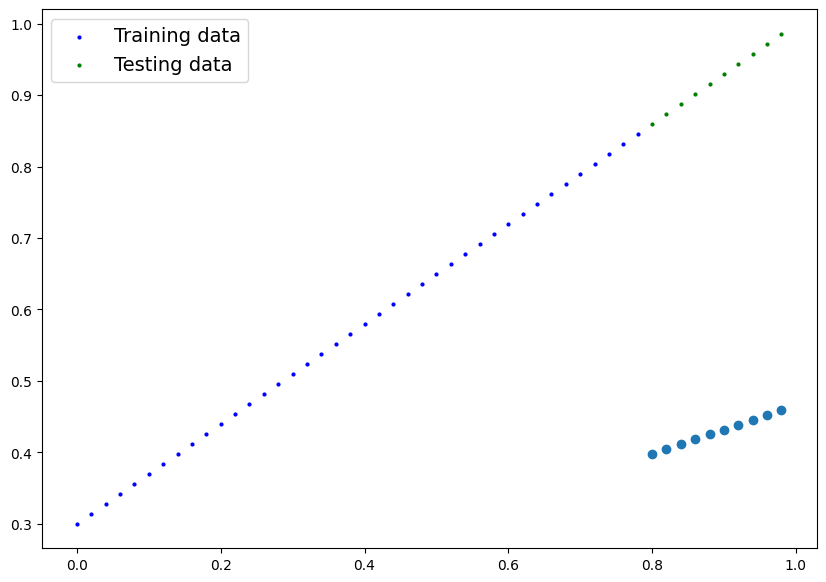

In [27]:
plot_predictions(predictions=y_preds)

### Train Model

Moving a model from some unknown parameters to known ones.

One way to measure how poor is our model performing, we use loss functions.

Loss functions may also be called cost function or criterion.

**Things we need to train:**

- Loss function
- Optimizers

Specifically for PyTorch, we need:

- A training loop
- A testing loop

In [28]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (Stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Building a training loop in PyTorch

0. Loop through the data
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward
5. Optimizer step

In [28]:
torch.manual_seed(42)

# An epoch is one loop through the data...
epochs = 1

# Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  # Turns off gradient tracking
  model_0.eval()